# NMF3D

### Tridimensional Normal Mode Functions

##### About the software:
 - NMF3D includes a Python and a Matlab version
 - works with both Python 2 and 3
 - for the Python version, Numpy and Scipy are required; netCDF4 is recommended

##### References:
- Kasahara, A. (1976). Normal modes of ultralong waves in the atmosphere, Mon. Weather Rev., 104(6), 669-690.
[https://doi.org/10.1175/1520-0493(1976)104<0669:NMOUWI>2.0.CO;2](https://doi.org/10.1175/1520-0493(1976)104<0669:NMOUWI>2.0.CO;2)


- Kasahara, A. (1978). Further Studies on a Spectral Model of the Global Barotropic Primitive Equations with Hough Harmonic Expansions, J. Atmos. Sci., 35(11), 2043-2051.
[https://doi.org/10.1175/1520-0469(1978)035<2043:FSOASM>2.0.CO;2](https://doi.org/10.1175/1520-0469(1978)035<2043:FSOASM>2.0.CO;2)


- Shigehisa, Y. (1983). Normal Modes of the Shallow Water Equations for Zonal Wavenumber Zero, J. Meteorol. Soc. Jpn., 61(4), 479-493.
[https://doi.org/10.2151/jmsj1965.61.4_479](https://doi.org/10.2151/jmsj1965.61.4_479)


- Kasahara, A. (1984). The Linear Response of a Stratified Global Atmosphere to Tropical Thermal Forcing, J. Atmos. Sci., 41(14). 2217--2237.
[https://doi.org/10.1175/1520-0469(1984)041<2217:TLROAS>2.0.CO;2](https://doi.org/10.1175/1520-0469(1984)041<2217:TLROAS>2.0.CO;2)


- Swarztrauber, P. M. and Kasahara, A. (1985). The vector harmonic analysis of Laplace's tidal equations, SIAM J. Sci. Stat. Comput., 6(2), 464-491.
[https://doi.org/10.1137/0906033](https://doi.org/10.1137/0906033)


- Tanaka, H. L. (1985). Global energetics analysis by expansion into three-dimensional normal-mode functions during the FGGE winter, J. Meteorol. Soc. Jpn., 63(2), 180–200.
[https://doi.org/10.2151/jmsj1965.63.2_180](https://doi.org/10.2151/jmsj1965.63.2_180)


- Tanaka, H. L. and Kung, E. C. (1988). Normal-mode energetics of the general circulation during the FGGE year, J. Atmos. Sci., 45(2), 3723–3736.
[https://doi.org/10.1175/1520-0469(1988)045<3723:NMEOTG>2.0.CO;2](https://doi.org/10.1175/1520-0469(1988)045<3723:NMEOTG>2.0.CO;2)


- Castanheira, JM, Marques, CAF (2019). The energy cascade associated with daily variability of the North Atlantic Oscillation, Q J R Meteorol Soc., 145: 197-210.
[https://doi.org/10.1002/qj.3422](https://doi.org/10.1002/qj.3422)

### Contents

[1. Installation](#1.-Installation)

[2. Vertical space/time mean profile of temperature from a global dataset](#2.-Vertical-space/time-mean-profile-of-temperature-from-a-global-dataset)

[3. Vertical structure equation](#3.-Vertical-structure-equation)

[4. Hough vector functions](#4.-Hough-vector-functions)

[5. Expansion coefficients](#5.-Expansion-coefficients)

&nbsp;&nbsp;&nbsp;&nbsp;[5.1 3-D spectrum of total energy](#5.1-3-D-spectrum-of-total-energy)

&nbsp;&nbsp;&nbsp;&nbsp;[5.2 3-D spectrum of energy interactions](#5.2-3-D-spectrum-of-energy-interactions)

&nbsp;&nbsp;&nbsp;&nbsp;[5.2 storing the verical transform](#5.3-storing-the-vertical-transform)

[6. Inverse expansion coefficients](#5.-Inverse-expansion-coefficients)

[7. Appendix (Matlab version)](#6.-Appendix)

### 1. Installation
<pre>
git clone https://github.com/martalmeida/nmf3d.git
cd nmf3d
python setup.py install
</pre>

Test data used in this tutorial is available in the nmf3d_data repository:
<pre>
git clone https://github.com/martalmeida/nmf3d_data.git
</pre>

### 2. Vertical space/time mean profile of temperature from a global dataset
*nmf3d.calcs.profile*

The mean profile of temperature is needed for the NMF3D. The nmf3d_data repository
contains some ERA-INTERIM temperature files that can be used. These are very low space/time
resolution files just for testing.

In [1]:
datafolder='nmf3d_data'
f=datafolder+'/*'

import os, glob
files=glob.glob(f)
files.sort()
for f in files:
    size=os.stat(f).st_size
    if size<(1024**2)/3: size='%5.1fK'%(size/1024)
    else: size='%5.1fM'%(size/1024**2)

    print('%-25s %s'%(os.path.basename(f),size))

PHI_ERA_I_1979_2010.txt     1.8K
PHI_raw.txt                 0.5K
README.md                   0.1K
T_01_1978_.nc4              1.4M
T_08_1978_.nc4              1.3M
T_ERA_I_1979_2010.txt       1.8K
u_01_1985_.nc4              1.4M
v_01_1985_.nc4              1.5M
z_01_1985_.nc4              1.1M


 The profile can be calculated with the function nmf3d.calc.profile which returns the temperature (K) and pressure (Pa).

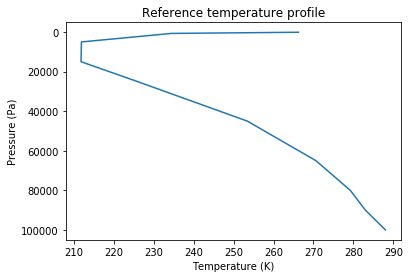

In [2]:
import nmf3d

Tfiles=glob.glob(datafolder+'/T*.nc4')
Tfiles.sort()

t,lev_mb=nmf3d.calcs.profile(Tfiles,quiet=1)
lev=lev_mb*100 # Pa
%matplotlib inline
import pylab as pl
pl.plot(t,lev)
pl.ylabel('Pressure (Pa)')
pl.xlabel('Temperature (K)')
pl.title('Reference temperature profile')
pl.gca().invert_yaxis()

In order to be used with other datasets, nmf3d.calcs.profile accepts as input arguments
the names of the variables to load (lon, lat, pressure and temperature). The lon and lat
can also be refined with splines using the option xmeth and ymeth. Ex.:

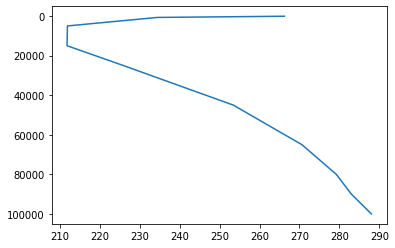

In [3]:
t,lev_mb=nmf3d.calcs.profile(Tfiles,xname='longitude',xmeth='spline',quiet=1)
lev=lev_mb*100
pl.plot(t,lev)
pl.gca().invert_yaxis()

nmf3d_data includes a more realistic reference temperature profile (30 years of ERA Interim data with spatial resolution of 1.5):

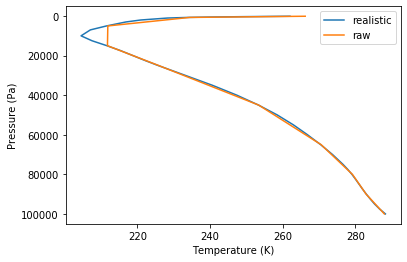

In [4]:
f=datafolder+'/T_ERA_I_1979_2010.txt'
import numpy as np
T,Lev=np.loadtxt(f)
pl.plot(T,Lev,label='realistic')
pl.plot(t,lev,label='raw')
pl.legend()
pl.gca().invert_yaxis()
pl.ylabel('Pressure (Pa)')
pl.xlabel('Temperature (K)');

### 3. Vertical structure equation
*nmf3d.vertical_structure.vse*

The vertical structure is calculated from a reference temperature profile
(temperature and the corresponding pressure levels, see above).

saving out_vs_ws0False.nc
saving out_vs_ws0True.nc


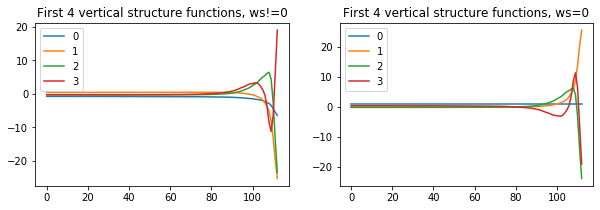

In [5]:
fig,ax=pl.subplots(1,2)
fig.set_size_inches((10,3))

Gn,hk,vfileF=nmf3d.vertical_structure.vse(T,Lev,ws0=False)
# returns the vertical structure functions, equivalent heights and output file name
ax[0].plot(Gn[:4].T);                                    
ax[0].legend(range(4))
ax[0].set_title('First 4 vertical structure functions, ws!=0')

Gn,hk,vfileT=nmf3d.vertical_structure.vse(T,Lev,ws0=True)
ax[1].plot(Gn[:4].T);
ax[1].legend(range(4))
ax[1].set_title('First 4 vertical structure functions, ws=0');

The output file (created by default and in netcdf format) includes additional variables like the pressure levels corresponding to the gaussian sigma levels, which can be used to make some plots:

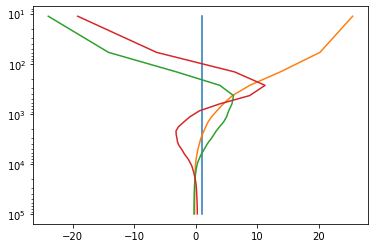

In [6]:
import netCDF4
plev=netCDF4.Dataset(vfileT).variables['plev'][:]
pl.semilogy(Gn[:4].T,plev)
pl.gca().invert_yaxis()

The options regarding the output file creation are:

 - save, save output to a file, True
 - format, output file format: npz or netcdf (default)

There are other important options:
- ws0, pressure vertical velocity zero at surface, False by default
- n_leg, number of Legendre polynomials to use, len(data)+20 by default

Let us now check the contents of the output netcdf file and then test the format and ws0 options:

In [7]:
nmf3d.calcs.ncshow(vfileT,Lmax=50)
# remove the Lmax option to see te entire variables' long_name


# Contents of the NetCDF file
   out_vs_ws0True.nc

:: Global Attributes:
   date           2020-03-03 23:29:00.116931                        
   ws0            True                                              
   n_leg          57                                                
   platform       Linux-3.10.0-1062.12.1.el7.x86_64-x86_64-with-cen+
   environment    python                                            
   version        3.7.5 (default, Oct 25 2019, 15:51:11) [GCC 7.3.0]
   version_scipy  1.3.1                                             
   version_numpy  1.17.2                                            

:: Dimensions:
   nk_max     37
   GL        113
   nlevels0   37

:: Variables:
                                long_name                         units      shape  
   Gn     | Vertical structure functions                       |         | (37, 113) |
   hk     | Equivalent heights                                 |         | (37,)     |
   gamma0 | Static stability in 

In [8]:
Gn,hk,fname=nmf3d.vertical_structure.vse(T,Lev,format='npz',ws0=True)
print(hk)
print(list(np.load(fname)))

saving out_vs_ws0True.npz
[           inf 6.41440548e+03 2.78902424e+03 1.30045988e+03
 6.73503983e+02 4.02637644e+02 2.60347760e+02 1.72641016e+02
 1.24818417e+02 9.08828920e+01 6.53845605e+01 4.90581868e+01
 3.79207543e+01 2.97765454e+01 2.35242344e+01 1.86113727e+01
 1.47376884e+01 1.17108805e+01 9.31077741e+00 7.52973386e+00
 6.13734717e+00 5.04756621e+00 4.20547521e+00 3.53577676e+00
 3.00131784e+00 2.54732811e+00 2.16539123e+00 1.84416686e+00
 1.57499005e+00 1.34774250e+00 1.15765567e+00 9.99025605e-01
 8.66841142e-01 7.55206264e-01 6.60981316e-01 5.82052736e-01
 5.14712787e-01]
['Gn', 'hk', 'gamma0', 'plev', 'tprof0', 'plev0', 'ws0', 'n_leg', 'platform', 'environment', 'version', 'version_scipy', 'version_numpy']


Note that if ws0 is True, the first hk is infinite, as expected

### 4. Hough vector functions
*nmf3d.hough_functions.hvf*

Hough vector functions as described in Swarztrauber and Kasahara (1985)

Part I: The frequencies and the Hough functions are computed for zonal wave number m = 0

Part II: The frequencies and the Hough functions are computed for zonal wave numbers m > 0

Inputs:
 - equivalent heights
 - M, maximum zonal wave number used in the expansion: m=0,1,...,M
 - nLR, total number of (west) Rossby modes used in the expansion (should be even)
 - nLG , half the number of Gravity modes used in the expansion (should be even)
 - latType, latitude type: linear (default, equally spaced) or gaussian
  
The total number of the Gravity modes will be 2*nLG=nLG(east gravity)+nLG(west gravity)

Other important inputs (kargs):
  - dlat, latitude spacing if latType is linear (default is 1.5, ie, 121 points) or number of gaussian lats if latType is gaussian (default is 128, corresponding to a spectral truncature of T85)
  - save, create file [True]
  - format, file format: [nc] or npz

In [9]:
Gn,hk,vfileT=nmf3d.vertical_structure.vse(T,Lev,ws0=True)
nk=5 # number of function to keep
hvf_dataT,hfileT=nmf3d.hough_functions.hvf(hk[:nk],M=6,nLR=8,nLG=6,dlat=6)

# * Important *
# dlat was set to 6 because the output file will be used in the
# next step together with some ERA-Interim raw data where latitude
# spacing is 6 deg.

saving out_vs_ws0True.nc
- HVF baroclinic -
Part I
  - Matrix C
  - Matrix D
  - Matrix E
  - Matrix F
  - Coeffs An, Bn, Cn
  - Normalized Associated Legendre Functions - M=0
  - Normalized Associated Legendre Functions - M=1
  - HVF: gravity modes
  - HVF: rossby modes
End of part I (zonal wave number zero)
Part II
  1 of 6
  - Matrix A
  - Matrix B
  - selecting freqs and coeffs
  - Associated Legendre Functions
  - spherical vector harmonics
  - HVF: gravity
  - HVF: rossby
  2 of 6
  3 of 6
  4 of 6
  5 of 6
  6 of 6
End of part II (zonal wave numbers m>0)

- HVF barotropic -
Part I
End of part I (zonal wave number zero)
Part II
End of part II (zonal wave numbers m>0)
saving out_hvf_M6_nLR8_nLG12_NEH5_dlat6linear_ws0True.nc


Example with ws0 False:

In [10]:
Gn,hk,vfileF=nmf3d.vertical_structure.vse(T,Lev,ws0=False)
hvf_dataF,hfileF=nmf3d.hough_functions.hvf(hk[:nk],M=6,nLR=8,nLG=6,dlat=6)

saving out_vs_ws0False.nc
- HVF baroclinic -
Part I
  - Matrix C
  - Matrix D
  - Matrix E
  - Matrix F
  - Coeffs An, Bn, Cn
  - Normalized Associated Legendre Functions - M=0
  - Normalized Associated Legendre Functions - M=1
  - HVF: gravity modes
  - HVF: rossby modes
End of part I (zonal wave number zero)
Part II
  1 of 6
  - Matrix A
  - Matrix B
  - selecting freqs and coeffs
  - Associated Legendre Functions
  - spherical vector harmonics
  - HVF: gravity
  - HVF: rossby
  2 of 6
  3 of 6
  4 of 6
  5 of 6
  6 of 6
End of part II (zonal wave numbers m>0)
saving out_hvf_M6_nLR8_nLG12_NEH5_dlat6linear_ws0False.nc


Let us take a look at the saved file contents:

In [11]:
nmf3d.calcs.ncshow(hfileF)


# Contents of the NetCDF file
   out_hvf_M6_nLR8_nLG12_NEH5_dlat6linear_ws0False.nc

:: Global Attributes:
   date           2020-03-03 23:29:04.164331                                        
   platform       Linux-3.10.0-1062.12.1.el7.x86_64-x86_64-with-centos-7.7.1908-Core
   environment    python                                                            
   version        3.7.5 (default, Oct 25 2019, 15:51:11) [GCC 7.3.0]                
   version_scipy  1.3.1                                                             
   version_numpy  1.17.2                                                            

:: Dimensions:
   components_uvz                         3
   max_zonal_wave_number_and_zonal_mean   7
   number_meridional_modes               20
   lat                                   31
   number_equivalent_heights              5

:: Variables:
                           long_name                shape      
   HOUGHs_UVZ_real | hough functions - real | (3, 7, 20, 5, 31) |
 

### 5. Expansion coefficients
*nmf3d.expansion_coeffs.calc*

Vertical, Fourier and Hough transforms of:

 - zonal wind (u), meridional wind (v) and geopotential (z) perturbation (from the
      reference  geopotential), used for the 3-D spectrum of total energy
      

 - I1, I2 and J3, used for the 3-D spectrum of energy interactions (kinetic and available pontential energy)
     - I1: zonal component of the kinetic energy interaction term (square brakets of eq. A16, ref)
     - I2: meridional component of the kinetic energy interaction term (square brakets of eq. A17, ref)
     - J3: available potential energy interaction term (square brakets of eq. A18, ref)

ref:
Castanheira, JM, Marques, CAF (2019). The energy cascade associated with daily variability of the North Atlantic Oscillation, Q J R Meteorol Soc., 145: 197-210. https://doi.org/10.1002/qj.3422

inputs:
- vfile,  equivalent heights and vertical structure functions file (output file from step [3](#3.-Vertical-structure-equation))
 
- hfile, Hough functions file (output file from step [4](#4.-Hough-vector-functions))
 
- data: dict with fields (u,v,z) or (I1,I2) or (J3). Each entry must also be a dictionary, with fields lon, lat, P (pressure levels) and v (the u, v, z, I1, I2 or J3)
 
The input files vfile and hfile can be netcdf or npz. The function accepts other arguments like the save karg (True by default) and the format (nc or npz). 

Returns the expansion coefficients (eddies and zonal components combined), as well as saved filename if save is true.

#### 5.1 3-D spectrum of total energy

#### i) loading data:
nmf3d includes an example function to load (u,v,z) data from ERA-Interim. The functions can be easily converted to load data from other datasets. The loading of the data will now be explained using (low space/time resolution) ERA-Interim files present in nmf3d_data.

In [12]:
import netCDF4
fu=datafolder+'/u_01_1985_.nc4'
fv=datafolder+'/v_01_1985_.nc4'
fz=datafolder+'/z_01_1985_.nc4'

data_u={}
data_v={}
data_z={}

# Let us start with u:
nc=netCDF4.Dataset(fu)
data_u['P']=nc.variables['lev'][:].astype('d')
data_u['lon']=nc.variables['lon'][:].astype('d')
data_u['lat']=nc.variables['lat'][:][::-1].astype('d') # reverse to have -90:90
data_u['v']=nc.variables['var131'][:][:,:,::-1,:].astype('d') # also reverse due to lat
nc.close()

# do the same thing with v (actually lon, lat and P are only needed inside data_u)
nc=netCDF4.Dataset(fv)
data_v['v']=nc.variables['var132'][:][:,:,::-1,:].astype('d') 
nc.close()

For geopotential the reference profile must be subtracted. The profile can be obtained following step 1. So let us do this first:

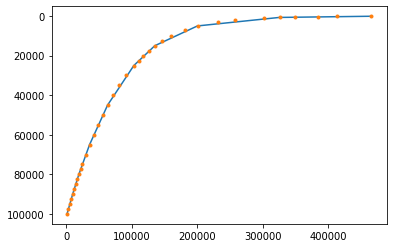

In [13]:
files=datafolder+'/z*'
Z,Zlev=nmf3d.calcs.profile(files,xname='lon',yname='lat',zname='lev', quiet=1)
pl.plot(Z,Zlev)
pl.gca().invert_yaxis()
Zref=Z.astype('d') # for later use

# we could save this data for future use:
#np.savetxt(datafolder+'/PHI_raw.txt',[Zref,Zlev])
# but the file is already there!

# nmf3d_data also includes a realistic geopotential profile from ERA-Interim:
f=datafolder+'/PHI_ERA_I_1979_2010.txt'
z_,zlev_=np.loadtxt(f)
pl.plot(z_,zlev_,'.');

Now let us load the geopotential subtracting the reference. Note that some datasets provide not the geopotential but the geopotential height. In such cases it must be divided by *g*.

In [14]:
# Load geopotential:
nc=netCDF4.Dataset(fz)
z=nc.variables['var129'][:][:,:,::-1,:].astype('d')
nc.close()

# convert from geoptential height if needed:
# z/=nmf3d.constants.g


# subtract the reference profile:
for i in range(z.shape[1]): z[:,i,:,:]-=Zref[i]

data_z['v']=z

Now we join all the data needed in a dictionary

In [15]:
data=dict(u=data_u,v=data_v,z=data_z)

A similar code is in module load_ERA_I so that loading the data could be done simply as:

In [16]:
from nmf3d import load_ERA_I
data=load_ERA_I.load(fu,fv,fz,datafolder+'/PHI_raw.txt',height=False)

loading u : ....nmf3d_data/u_01_1985_.nc4
    - loading var131
loading v : ....nmf3d_data/v_01_1985_.nc4
    - loading var132
loading z : ....nmf3d_data/z_01_1985_.nc4
    - loading var129
    - subtracting reference


#### ii) 3-D spectrum
##### 1. ws0 False

In [17]:
w_nlkF,wfileF=nmf3d.expansion_coeffs.calc(vfileF,hfileF,data,label='out_ws0_False')

- Expansion coefficients -
 - loading parameters from Hough functions file:
    out_hvf_M6_nLR8_nLG12_NEH5_dlat6linear_ws0False.nc
 - loading vertical structure functions:
    out_vs_ws0False.nc
 - zonal wind - interpolate p to sigma
 - zonal wind - vertical transform
 - zonal wind - Fourier transform
 - meridional wind - interpolate p to sigma
 - meridional wind - vertical transform
 - meridional wind - Fourier transform
 - geopotential - interpolate p to sigma
 - geopotential - vertical transform
 - geopotential - Fourier transform
 - loading Hough vector functions:
    out_hvf_M6_nLR8_nLG12_NEH5_dlat6linear_ws0False.nc
 - computing
saving out_ws0_False_w_nlk.nc


An output file was created. Let's check it:

In [18]:
nmf3d.calcs.ncshow(wfileF)


# Contents of the NetCDF file
   out_ws0_False_w_nlk.nc

:: Global Attributes:
   date           2020-03-03 23:29:55.497271                                        
   platform       Linux-3.10.0-1062.12.1.el7.x86_64-x86_64-with-centos-7.7.1908-Core
   environment    python                                                            
   version        3.7.5 (default, Oct 25 2019, 15:51:11) [GCC 7.3.0]                
   version_scipy  1.3.1                                                             
   version_numpy  1.17.2                                                            

:: Dimensions:
   number_equivalent_heights   5
   max_zonal_wave_number       7
   total_meridional_modes     20
   time                       31

:: Variables:
                                            long_name                                    shape     
   w_nlk_real | Expansion coefficients of dependent variable vector u, v, z (real) | (5, 7, 20, 31) |
   w_nlk_imag | Expansion coefficients of dep

##### 2. ws0 True

In [19]:
w_nlkT,wfileT=nmf3d.expansion_coeffs.calc(vfileT,hfileT,data,label='out_ws0_True')

- Expansion coefficients -
 - loading parameters from Hough functions file:
    out_hvf_M6_nLR8_nLG12_NEH5_dlat6linear_ws0True.nc
 - loading vertical structure functions:
    out_vs_ws0True.nc
 - zonal wind - interpolate p to sigma
 - zonal wind - vertical transform
 - zonal wind - Fourier transform
 - meridional wind - interpolate p to sigma
 - meridional wind - vertical transform
 - meridional wind - Fourier transform
 - geopotential - interpolate p to sigma
 - geopotential - vertical transform
 - geopotential - Fourier transform
 - loading Hough vector functions:
    out_hvf_M6_nLR8_nLG12_NEH5_dlat6linear_ws0True.nc
 - computing
saving out_ws0_True_w_nlk.nc


#### iii) plots

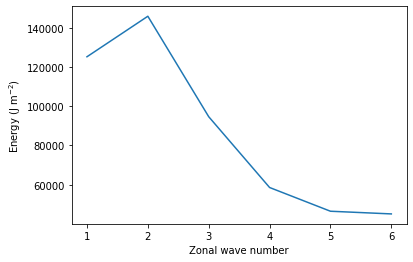

In [20]:
w_nlk=w_nlkF
nk,nM,nL,nT=w_nlk.shape

E0=np.zeros((nk,nL,nT))
En=np.zeros((nk,nM-1,nL,nT))

for i in range(nk):
    E0[i]=1/4*1e5*hk[i]*(w_nlk[i,0]*w_nlk[i,0].conj()).real
    En[i]=1/2*1e5*hk[i]*(w_nlk[i,1:]*np.conj(w_nlk[i,1:])).real

v=En.mean(3).sum(2).sum(0)
x=range(1,v.size+1)
pl.plot(x,v)
pl.xlabel('Zonal wave number')
pl.ylabel('Energy (J m$^{-2}$)');

#### 5.2 3-D spectrum of energy interactions

In this case, the user needs to calculate I1, I2 and J3. We provide here just an example, considering these terms were previously computed and stored in the files I1.npy, I2.npy and J3.npy, and the user has the variables lon, lat and P:

In [21]:
if 0:
  data_i1=dict(lon=lon,lat=lat,P=P,v=np.load('I1.npy'))
  data_i2=dict(lon=lon,lat=lat,P=P,v=np.load('I2.npy'))
  data_j3=dict(lon=lon,lat=lat,P=P,v=np.load('J3.npy'))

  data_i=dict(I1=data_i1,I2=data_i2)
  i_nlk,ifsave=nmf3d.expansion_coeffs.calc(vfileF,hfileF,data_i,label='out_i_ws0_True')

  idata_j=dict(J3=data_j3)
  j_nlkF,jfsave=nmf3d.expansion_coeffs.calc(vfileF,hfileF,data_j,label='out_j_ws0_True')

#### 5.3 storing the vertical transform

The vertical transform of geopotential, zonal and meridional wind, term I1, term I2 and term J3 can be stored (as npz or netcdf)

*nmf3d.transforms.vertical* is called from *nmf3d.expansion_coeffs.calc* without saving the vertical transform.

In order to save the output from vertical transform *nmf3d.transforms.vertical* must be used with the required inputs arguments:
- u, variable defined at pressure levels
- hk, equivalent heights
- nk, total number of equivalent heights
- Gn, vertical structure functions
- p_old, original pressure levels
- p_new, Gaussian pressure levels
- dataLabel, variable type:
    - 'zonal wind'
    - 'meridional wind'
    - 'geopotential'
    - 'I1'
    - 'I2'
    - 'J3'
- and the karg save=True

### 6. Inverse expansion coefficients

  Inverse of Vertical, Fourier and Hough transforms.
  
  The zonal and meridional wind, and geopotential perturbation
  can be reconstructed in the physical space using a chosen set of modes, with:
  
  *nmf3d.inv_expansion_coeffs.calc*
  
inputs:
- vfile,  equivalent heights and vertical structure functions file (output file from step [3](#3.-Vertical-structure-equation))
 
- hfile, Hough functions file (output file from step [4](#4.-Hough-vector-functions))

- wfile,  expansion coefficients file (output file from step [5](#5.-Expansion-coefficients))


- zi, wavenumber indices, zi=0 (Zonal mean) and zi>0 (Eddies)
- mi, meridional indices
- vi, vertical indices, vi=0 (Barotropic mode) and vi>0 (Baroclinic modes)
- pl, pressure levels (hPa units)
- lon, longitudes (deg units)

The input files vfile, hfile and wfile can be netcdf or npz. The function accepts other arguments like the save karg (True by default), the format (nc or npz) and uvz (variables to compute, (1,1,1) by default) 

Returns the reconstructed  zonal and meridional wind, and geopotential perturbation,
as well as saved filename if save is true
  


In [22]:
zi=[1,2,3]
mi=[1,2,3]
vi=[1,2]
plev=[850,500]
lon=np.arange(0,360,30)

out,iwfileT=nmf3d.inv_expansion_coeffs.calc(vfileT,hfileT,wfileT,zi,mi,vi,plev,lon)

 - loading vertical structure functions:
    out_vs_ws0True.nc
 - loading Hough vector functions:
    out_hvf_M6_nLR8_nLG12_NEH5_dlat6linear_ws0True.nc
 - loading expansion coefficients:
    out_ws0_True_w_nlk.nc
 - computing
saving outinv_uvz.nc


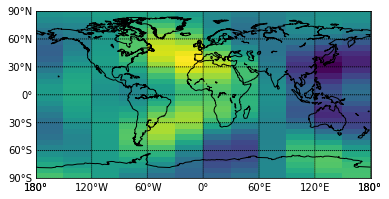

In [23]:
from mpl_toolkits.basemap import Basemap

# to avoid some basemap warning:
import warnings
warnings.filterwarnings("ignore")

m=Basemap(projection='cyl',resolution='c',llcrnrlon=-180,urcrnrlon=180,llcrnrlat=-90,urcrnrlat=90)


x,y,u=out['lon'],out['lat'],out['u'][-1,-1]
uu=np.zeros((u.shape[0],u.shape[1]+1))
uu[:,:-1]=u
uu[:,-1]=uu[:,0]
x=np.hstack((x,360))
x,y=np.meshgrid(x,y)
x,u=m.shiftdata(x,uu)

pl.pcolormesh(x,y,u)
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,30.),labels=(1,0,0,0))
m.drawmeridians(np.arange(-180.,181.,60.),labels=(0,0,0,1));

### 7. Appendix
##### Matlab version

The same results of the previous Python tutorial can be obtained with the Matlab version of code like. In terms of input/output, the Matlab version also deals with netcdf files, as well as and its native format (mat instead of npz).

```matlab
% ------------------------------------ adjust paths:
addpath('../nmf3d_mat'); % change for your case
datafolder='./nmf3d_data/';

% ------------------------------------ vertical structure:
f=[datafolder 'T_ERA_I_1979_2010.txt'];
a=load(f);
T=a(1,:);
Lev=a(2,:);

[GnT,hkT,vfileT]=vertical_structure(T,Lev,'ws0',1);
[GnF,hkF,vfileF]=vertical_structure(T,Lev,'ws0',0);

% ------------------------------------ Hough functions:
M=6;
nLR=8;
nLG=6;
nk=5; % number of function to keep

[hvf_dataT,hfileT]=hough_functions(hkT(1:nk),M,nLR,nLG,'linear','dlat',6);
[hvf_dataF,hfileF]=hough_functions(hkF(1:nk),M,nLR,nLG,'linear','dlat',6);

% ------------------------------------ expansion coefficients:
% 3-D spectrum of total energy W_nlk
fu    = [datafolder 'u_01_1985_.nc4'];
fv    = [datafolder 'v_01_1985_.nc4'];
fz    = [datafolder 'z_01_1985_.nc4'];
fzref = [datafolder 'PHI_raw.txt'];

height=0;
data=load_ERA_I(fu,fv,fz,fzref,height);

[w_nlkT,wfileT]=expansion_coeffs(vfileT,hfileT,data,'label','outT');
[w_nlkF,wfileF]=expansion_coeffs(vfileF,hfileF,data,'label','outF');

% energy:
w_nlk=w_nlkT;
for i=1:nk
    E0(i,1,:,:)=1/4*1e5*hkT(i)*(w_nlk(i,1,:,:).*conj(w_nlk(i,1,:,:)));
    En(i,:,:,:)=1/2*1e5*hkT(i)*(w_nlk(i,2:end,:,:).*conj(w_nlk(i,2:end,:,:)));
end

% 3-D spectrum of energy interactions
if 0
  % assuming the coefficients were calculated and stored in the files
  % I1.mat, I2.mat and J3.mat; and the user has the variables lon, lat and P:

  data_i1=struct('lon',lon,'lat',lat,'P',P,'v',load('I1.mat'));
  data_i2=struct('lon',lon,'lat',lat,'P',P,'v',load('I2.mat'));
  data_j3=struct('lon',lon,'lat',lat,'P',P,'v',load('J3.mat'));

  data_i=struct('I1',data_i1,'I2',data_i2);
  [i_nlk,ifsave]=expansion_coeffs(vfileT,hfileT,data_i,'label','out_i_ws0_True');

  data_j=struct('J3',data_j3);
  [j_nlk,jfsave]=expansion_coeffs(vfileT,hfileT,data_j,'label','out_j_ws0_True');
end

% storing the vertical transform
if 0
  u=data.u.v;
  [u_k,fsave]=vertical_transform(u,hk,nk,Gn,p_old,p_new,dataLabel,'meridional wind')
end

% ------------------------------------ inverse expansion coefficients:
zi=[1,2,3];
mi=[1,2,3];
vi=[1,2];
pl=[850,500];
lon=0:30:359;
[uvz,invfsave]=inv_expansion_coeffs(vfileT,hfileT,wfileT,zi,mi,vi,pl,lon);
```